In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('DATA/StudentsPerformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


1)check missing values
2)check Duplicates
3)check data type
4)check unique value
5)check statistics od data set
6)check Catagories colume

In [5]:
### check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
### check duplicates
df.duplicated().sum()

0

In [7]:
### check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
### checking the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
### check statistics of data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
### checking  unique values of each column

unique_vals = df.apply(lambda colume: colume.unique())

In [17]:
unique_vals

gender                                                            [female, male]
race/ethnicity                     [group B, group C, group A, group D, group E]
parental level of education    [bachelor's degree, some college, master's deg...
lunch                                                   [standard, free/reduced]
test preparation course                                        [none, completed]
math score                     [72, 69, 90, 47, 76, 71, 88, 40, 64, 38, 58, 6...
reading score                  [72, 90, 95, 57, 78, 83, 43, 64, 60, 54, 52, 8...
writing score                  [74, 88, 93, 44, 75, 78, 92, 39, 67, 50, 52, 4...
dtype: object

In [19]:
for i in unique_vals.index:
    print(f'Column Name:{i}')
    print(unique_vals[i])
    print("-" * 50)

Column Name:gender
['female' 'male']
--------------------------------------------------
Column Name:race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
--------------------------------------------------
Column Name:parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
--------------------------------------------------
Column Name:lunch
['standard' 'free/reduced']
--------------------------------------------------
Column Name:test preparation course
['none' 'completed']
--------------------------------------------------
Column Name:math score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
-----------------------

In [ ]:
### define numerial and catagorical columes

cat_feature=df.select_dtypes(include=['object']).columns.to_list()
num_feature=df.select_dtypes(exclude=['object']).columns.to_list()

In [26]:
print("Numerical columns:", num_feature)
print("Categorical columns:", cat_feature)

Numerical columns: ['math score', 'reading score', 'writing score']
Categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [27]:
### adding columes for Totall Score and Average score

df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
full_mark_reading=df[df['reading score'] == 100]['average'].count()
full_mark_writing=df[df['writing score'] == 100]['average'].count()
full_mark_math=df[df['math score'] == 100]['average'].count()

fail_in_reading=df[df['reading score'] <= 20]['average'].count()
fail_in_writing=df[df['writing score'] <= 20]['average'].count()
fail_in_math=df[df['math score'] <= 20]['average'].count()

In [38]:
print(" Students who scored full marks (100):")
print(f" - Reading: {full_mark_reading}")
print(f" - Writing: {full_mark_writing}")
print(f" - Math: {full_mark_math}")
print()

print(" Students who failed (score ≤ 20):")
print(f" - Reading: {fail_in_reading}")
print(f" - Writing: {fail_in_writing}")
print(f" - Math: {fail_in_math}")


 Students who scored full marks (100):
 - Reading: 17
 - Writing: 14
 - Math: 7

 Students who failed (score ≤ 20):
 - Reading: 1
 - Writing: 3
 - Math: 4


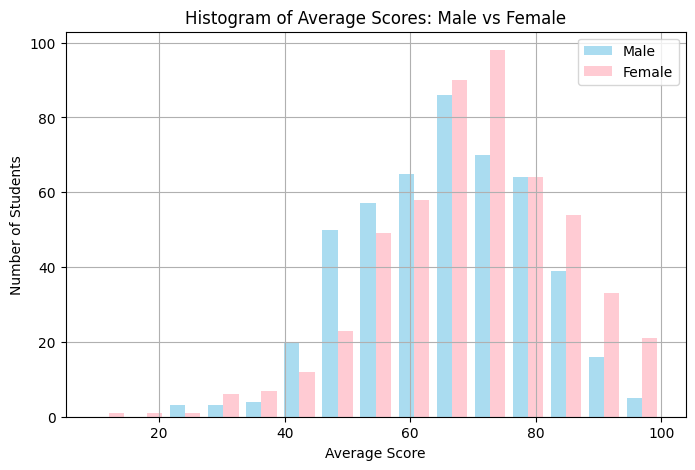

In [40]:
# Separate data by gender
male_avg = df[df['gender'] == 'male']['average']
female_avg = df[df['gender'] == 'female']['average']

# Plotting
plt.figure(figsize=(8, 5))
plt.hist([male_avg, female_avg], bins=15, label=['Male', 'Female'], color=['skyblue', 'lightpink'], alpha=0.7)
plt.title("Histogram of Average Scores: Male vs Female")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.legend()
plt.grid(True)
plt.show()